# Deep Learning for Automated Medical Diagnosis of Malaria
**Gonçalo Marques, Antonio Ferreras, Isabel de la Torre**

*Department of Signal Theory and Communications, and Telematics Engineering University of Valladolid, Paseo de Belén, 15, 47011, Valladolid, Spain*


## Environment

### Install required libraries 

* __[`twine`](https://pypi.org/project/twine/)__: Utility for publishing Python packages on PyPI.
* __[`scikit-learn`](https://scikit-learn.org/stable/)__: e Various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means 
* __[`ImageDataAugmentor`](https://github.com/mjkvaak/ImageDataAugmentor)__: Custom image data generator for Keras supporting the use of modern augmentation modules
* __[`efficientnet`](https://pypi.org/project/twine/)__: Convolutional Neural Network model

In [ ]:
!pip install -q twine
!pip install -U -q scikit-learn
!pip install -q git+https://github.com/mjkvaak/ImageDataAugmentor
!pip install -q efficientnet

### Parameters
Set of parameters to carry out different simmulations, with different models and different sizes of image sets

In [ ]:
QUICK_AND_DIRTY = False  # False: Full simmulation. 
                         # True: Fast simulation for cheking the code

# To differenciate the running environment: Google Colab or Local machine
import os
COLAB = ('COLAB_GPU' in os.environ)  # True if we are in a Colab environment

DEVICE = "GPU"              # TPU NOT WORKING AT THE MOMENT

# Origin of Zip file
FILENAME = 'cell-images-for-detecting-malaria.zip'

if COLAB:
    DIRNAME = '/content/drive/My Drive/Colab Notebooks/MALARIA/'
else:
    DIRNAME = './'

# Where to decompress the content of the ZIP file
ORIDIR = "cell_images/"

# Local Directory for classified images (train / test / validate)
DESTDIR = "data/"

# Aleatory parameter to reproduce the experiments
SEED = 1234

if QUICK_AND_DIRTY:
    PERC = 5       # Percentage of images to deal with (5, 25, 50 ...)
    KFOLD = 2      # Numbers of folds in the k-fold process
    EPOCHS = 3     # Number of EPOCHS to run in each fold
    VERBOSE = 1    # How much the functions talk about its problems
    PATIENCE = 3   # Parameter for ReduceLROnPlateau() 
else:
    PERC = 0       # Complete set 22,046 images
    KFOLD = 10     # 10-kfold method
    EPOCHS = 33    # long run
    VERBOSE = 0    # Plea, be quiet!
    PATIENCE = 6   # Parameter for ReduceLROnPlateau()

BATCH_SIZE = 16

SAVE_RESULTS = True   # Only if there is only one simulation per model
FILERES = 'results.p' # Filename to store results

# Need to load the different models to get the funciotn name available
import efficientnet.tfkeras as efn
import tensorflow.keras.applications as app


## Diffferent configuration parameters to run different models simmultaneously
# modelos: Array with the parameters to perform a specific simmulation with a model
# [name, function, preprocessing, learningSet, width, hight, freezeModel, process]
#    name: name of the model of the Keras application
#    function: function of the Keras Application 
#    preprocessing: Keras function for preprocessing images
#    learningset: 'noisy-student' or'imagenet' 
#    width: Input width (in pixels) of the images required by the model
#    height: Input height (in pixels) of the images required by the model
#    freezeModel: TRUE. The base model is frozen and its parameters are not trained
#    precess: True if we want to process this line
modelos = [
    ['EfficientNetB0', efn.EfficientNetB0, None, 'noisy-student', 224, 224, False, True],
    ['EfficientNetB0', efn.EfficientNetB0, None, 'noisy-student', 224, 224, True, False],
    ['EfficientNetB1', efn.EfficientNetB1, None, 'noisy-student', 240, 240, False, False],
    ['EfficientNetB2', efn.EfficientNetB2, None, 'noisy-student', 260, 260, False, False],
    ['EfficientNetB3', efn.EfficientNetB3, None, 'noisy-student', 300, 300, False, False],
    ['EfficientNetB4', efn.EfficientNetB4, None, 'noisy-student', 380, 380, False, False],
    ['EfficientNetB5', efn.EfficientNetB5, None, 'noisy-student', 456, 456, False, False],
    ['EfficientNetB6', efn.EfficientNetB6, None, 'noisy-student', 528, 528, False, False],
    ['EfficientNetB7', efn.EfficientNetB7, None, 'noisy-student', 600, 600, False, False],
    ['Xception', app.Xception, app.xception.preprocess_input, 'imagenet', 229, 229, False, False],
    ['VGG16', app.VGG16, app.vgg16.preprocess_input, 'imagenet', 224, 224, False, False],
    ['VGG19', app.VGG19, app.vgg19.preprocess_input, 'imagenet', 224, 224, False, False],
    ['ResNet50', app.ResNet50, app.resnet.preprocess_input, 'imagenet', 224, 224, False, False],
    ['ResNet101521', app.ResNet101, app.resnet.preprocess_input, 'imagenet', 224, 224, False, False],
    ['ResNet152', app.ResNet152, app.resnet.preprocess_input, 'imagenet', 224, 224, False, False],
    ['ResNet50V2', app.ResNet50, app.resnet_v2.preprocess_input, 'imagenet', 224, 224, False, False],
    ['ResNet101V2', app.ResNet101V2, app.resnet_v2.preprocess_input, 'imagenet', 224, 224, False, False],
    ['ResNet152V2', app.ResNet152V2, app.resnet_v2.preprocess_input, 'imagenet', 224, 224, False, False],
    ['MobileNet', app.MobileNet, app.mobilenet.preprocess_input, 'imagenet', 224, 224, False, False],
    ['InceptionV3', app.InceptionV3, app.inception_v3.preprocess_input, 'imagenet', 229, 229, False, False],
    ['InceptionResNetV2', app.InceptionResNetV2, app.inception_resnet_v2.preprocess_input, 'imagenet', 229, 229, False, False],
    ['DenseNet121', app.DenseNet121, app.densenet.preprocess_input, 'imagenet', 224, 224, False, False],
    ['DenseNet169', app.DenseNet169, app.densenet.preprocess_input, 'imagenet', 224, 224, False, False],
    ['DenseNet201', app.DenseNet201, app.densenet.preprocess_input, 'imagenet', 224, 224, False, False],
    ['NASNetLarge', app.NASNetLarge, app.nasnet.preprocess_input, 'imagenet', 224, 224, False, False],
    ['NASNetMobile', app.NASNetMobile, app.nasnet.preprocess_input, 'imagenet', 224, 224, False, False]
    ]

print('Ready!!')

Ready!!


### GPU / TPU excution mode selection

Select GPU/TPU environment
TPU must be selected in the `Google Colab` environment

From `Kaggle`: __[Triple Stratified KFold with TFRecords](https://www.kaggle.com/cdeotte/triple-stratified-kfold-with-tfrecords)__ (Chris Deotte)

(TPU: Not working at the moment / can't be used)

In [ ]:
import tensorflow as tf

if DEVICE == "TPU":
    print('connecting to TPU...')
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        print('Running on TPU', tpu.master())
    except ValueError:
        print('Could not connect to TPU')
        tpu = None

    if tpu:
        try:
            print('Initializing TPU...')
            tf.config.experimental_connect_to_cluster(tpu)
            tf.tpu.experimental.initialize_tpu_system(tpu)
            strategy = tf.distribute.TPUStrategy(tpu)
            print('TPU initialized')
        except _:
            print('Failed to initialize TPU!!')
    else:
        DEVICE = "GPU"

if DEVICE != 'TPU':
    print("Using default strategy for CPU and single GPU")
    strategy = tf.distribute.get_strategy()

if DEVICE == 'GPU':
    print("Num  Available GPUs:", 
          len(tf.config.experimental.list_physical_devices('GPU')))

AUTO = tf.data.experimental.AUTOTUNE
print(f'AUTO: {AUTO}')
REPLICAS = strategy.num_replicas_in_sync
print(f'REPLICAS: {REPLICAS}')

print("\ntf.__version__ is", tf.__version__)
print("tf.keras.__version__ is:", tf.keras.__version__)

Using default strategy for CPU and single GPU
Num  Available GPUs: 1
AUTO: -1
REPLICAS: 1

tf.__version__ is 2.3.0
tf.keras.__version__ is: 2.4.0


## Input

Mounting Local Drive and download the images (only if needed: Colab environment)

In Local environment, the zip file is already present and previously extracted

In [ ]:
if COLAB:
    # Mount drive
    from google.colab import drive
    import shutil
    import os
    from zipfile import ZipFile
    
    drive.mount("/content/drive")
    shutil.copy(DIRNAME+FILENAME, FILENAME)
    ZipFile(FILENAME, 'r').extractall()
    os.remove(FILENAME)
    print(ORIDIR+': {} files'.format(len(os.listdir(ORIDIR))))
    
TIPOS = os.listdir(ORIDIR)        # Automatic List of classes extracted from directoies
print('Types: {}'.format(TIPOS))

Types: ['Parasitized', 'Uninfected']


## Configuration
1.	Import the images
2. Create two directories od the images with their labels according to classes
3.	Configure training, testing and validate the model using stratified 10-fold cross validation.

#### Create DataFrames

In [ ]:
import pandas as pd
import sklearn.model_selection 
import random
import shutil
import os

ficheros = []  # The list of image file names

if os.path.isdir(DESTDIR):  # remove dir if exists (to avoid errors)
    shutil.rmtree(DESTDIR)

os.mkdir(DESTDIR)           # create destinate directory

df_total = pd.DataFrame()   # dataframe for filenames + class

for tipo in TIPOS:
    ficheros = os.listdir(ORIDIR+tipo)
    df_total = pd.concat([df_total,
                          pd.DataFrame(list(zip(ficheros,
                                                [tipo]*(len(ficheros)))),
                                       columns=['file','label'])])
    for fichero in ficheros:   # cleaning files from stange types
        if fichero.lower().endswith(('.png', '.jpg', '.jpeg', 
                                     '.tiff', '.bmp', '.gif')):
            shutil.copy(ORIDIR+tipo+'/'+fichero, DESTDIR)
        else:
            os.remove(ORIDIR+tipo+'/'+fichero)
            print(f'Invalid file {fichero}')
            df_total = df_total.drop(df_total[df_total['file']==fichero].index)

if PERC != 0:     # Keep only a fraction of images to speed up the simmulation
    df_total = df_total.sample(n=round(len(df_total)*PERC/100.))

# Ramdonly split the images: 0.80 for learning /  0.20 for validatind
df_learn, df_val = sklearn.model_selection.train_test_split(df_total, 
                                                            test_size=0.2)
df_learn = pd.concat([df_learn, pd.get_dummies(df_learn['label'])], axis=1)    
df_val = pd.concat([df_val, pd.get_dummies(df_val['label'])], axis=1)    

print("DataFrame Learn : {} files".format(len(df_learn)))
print("DataFrame Learn : {} files".format(len(df_val)))


DataFrame Learn : 22046 files
DataFrame Learn : 5512 files


## Display random images
For testing purposes


Image Type: Parasitized


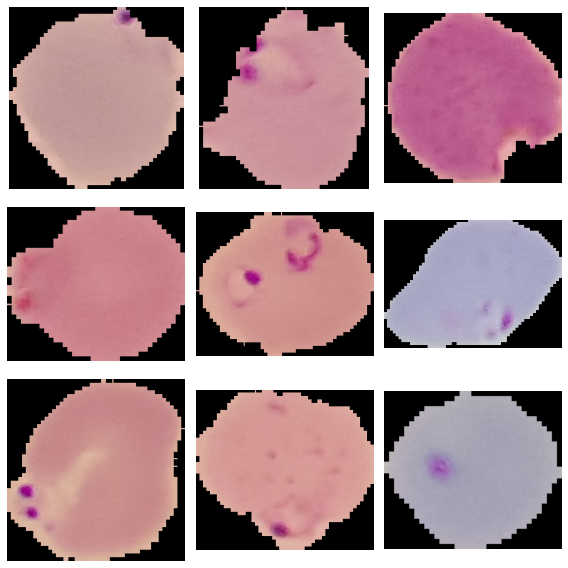


Image Type: Uninfected


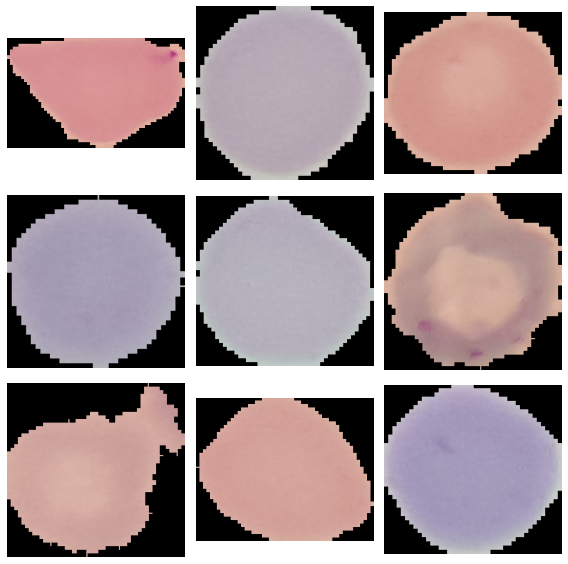

In [ ]:
import random
import matplotlib.pyplot as plt

N = 9  # Number of images of each class to display
for tipo in TIPOS:
    ficheros = list(df_total['file'][df_total['label']==tipo])
    images = random.sample(ficheros, N)
    print("\nImage Type: {}".format(tipo))
    plt.figure(figsize=(8,8))
    for i in range(N):
        plt.subplot(3, int(N/3),i+1)
        img = plt.imread(DESTDIR+images[i])
        plt.imshow(img)
        plt.axis('off')
    plt.tight_layout()
    plt.show()  

del [ficheros, df_total] 

# MODEL

## Auxiliary functions for plotting

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Plot confussion matrix
# y_true: real values
# y_pred: predicted values
# tipos: list with the names of the classes
def plot_confussion_matrix(y_true, y_pred, tipos):
    cm = confusion_matrix(y_true.values.argmax(axis = 1), y_pred.argmax(axis = 1))
    plt.figure(figsize=(6.5, 5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('\nAccuracy:{0:.4f}'.format(accuracy_score(y_true, y_pred)))
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.xticks(np.arange(len(tipos))+0.5, tipos)
    plt.yticks(np.arange(len(tipos))+0.25, tipos)
    plt.show()

# Plot ROC (Area under the curve)
# y_true: real values
# y_pred: predicted values
# tipos: list with the names of the classes
def plot_roc_curve(y_true, y_pred, tipos):
    plt.style.use('ggplot')
    plt.figure(figsize=(6.5, 5))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes=len(tipos)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true.values[:, i], y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    # Max. 6 classes
    colors = cycle(['blue', 'red', 'green', 'black', 'violet', 'brown'])
    
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5, \
                 label='ROC curve - {0} (area = {1:0.6f})'\
                 .format(TIPOS[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], linestyle='--', color = 'grey', lw=1)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    if n_classes == 2:
        plt.title('Receiver Operating Curve (binary-class)')
    else:
        plt.title('Receiver operating Curve (multi-class)')
    plt.legend(loc="lower right")
    plt.show()

# Plot history of the training
# hist: data to plot
# model: nName of the model
# fold: number of the fold of the k-fold algorithm
def plot_history(hist, model, fold):
    plt.figure(figsize=(8,5))
    plt.plot(hist['accuracy'],'-o',label='Train ACC',color='#ff7f0e')
    plt.plot(hist['val_accuracy'],'-o',label='Val ACC',color='#1f77b4')
    x = np.argmax(hist['val_accuracy']); y = np.max( hist['val_accuracy'])
    xdist = plt.xlim()[1] - plt.xlim()[0]; ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#1f77b4'); 
    plt.text(x-0.03*xdist,y-0.13*ydist,'max acc\n%.4f'%y,size=14)
    plt.ylabel('Accurary',size=14); 
    plt.xlabel('Epoch',size=14)
    plt.legend(loc=2)

    plt2 = plt.gca().twinx()
    plt2.plot(hist['loss'],'-o',label='Train Loss',color='#2ca02c')
    plt2.plot(hist['val_loss'],'-o',label='Val Loss',color='#d62728')
    x = np.argmin(hist['val_loss'] ); y = np.min(hist['val_loss'] )
    ydist = plt.ylim()[1] - plt.ylim()[0]
    plt.scatter(x,y,s=200,color='#d62728');
    plt.text(x-0.03*xdist,y+0.05*ydist,'min loss\n%.4f'%y, size=11)
    plt.ylabel('Loss',size=14)
    plt.title('%s  -  FOLD : %i'%(model, fold), size=18)
    plt.legend(loc=3)
    plt.show()  

print('Functions created!')

Functions created!


## Auxiliary Functios for modeling

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
import tensorflow as tf

# Create Keras model
# fnctn : function application of the base model
# wghs: pretrained weights to us in the model
# wdth: input width of the model
# hght: input heigh of the model
# frz: (Boolen) ¿train base model parameters?
def create_model(fnctn, wghs, wdth, hght, frz):
    model = fnctn(weights = wghs, include_top=False,
                  input_shape = (wdth, hght,3))
    
    if frz:
        model.trainable = False  # FIXING model

    x = model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.3)(x)
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.3)(x)
    predictions = Dense(len(TIPOS), activation="softmax")(x)
    model = Model(inputs=model.input, outputs=predictions)
    return model

# Callbacks for the model
# ReduceLROnPlateau: reduce the learning rate when learning dismishes
# ModelCheckPoint: to store models for future use
def create_callbacks(fold):
    return [ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5,
                              patience = PATIENCE, min_lr = 0.000001),
            ModelCheckpoint('model_{}.hdf5'.format(fold), save_best_only = True,
                            monitor = 'val_loss', mode ='min', save_freq='epoch')]
                            
# Create custom_loss with smoothing parameter
def custom_loss(y_true, y_pred):
  return tf.keras.losses.categorical_crossentropy(y_true, y_pred, 
                                                  label_smoothing=0.1) 

# Convert y_pred to 0 or 1, selecting the mximum value of softmax
def binary_decission(y_pred, tipos):
    decission = np.zeros((len(y_pred), len(tipos)), dtype=int)
    for i in range(len(y_pred)):
        decission[i, int(np.where(y_pred[i] == np.amax(y_pred[i]))[0])] = 1
    return decission 

print('Functions created!')

Functions created!


## Augmentation

Use __[`albumentations`](https://github.com/albumentations-team/albumentations)__ for image augmentation. The purpose of image augmentation is to create new training samples from the existing data. We use the following transformation in our model:

* `Flip`: Flip the input either horizontally, vertically or both horizontally and vertically.
* `Transpose`: Transpose the input by swapping rows and columns.
* `IAAAdditiveGaussianNoise`: Add gaussian noise to the input image.
* `GaussNoise`: Apply gaussian noise to the input image.
* `MotionBlur`: Apply motion blur to the input image using a random-sized kernel.
* `MedianBlur`: Blur the input image using a median filter with a random aperture linear size.
* `Blur`: Blur the input image using a random-sized kernel.
* `ShiftScaleRotate`: Randomly apply affine transforms: translate, scale and rotate the input.
* `OpticalDistortion`: Apply an optical distortion to the full image. 
* `GridDistortion`: Apply a grid distortion with padding.
* `IAAPiecewiseAffine`: Place a regular grid of points on the input and randomly move the neighbourhood of these point around via affine transformations.
* `CLAHE`: Apply Contrast Limited Adaptive Histogram Equalization to the input image.
* `IAASharpen`: Sharpen the input image and overlays the result with the original image. This augmentation is deprecated. Please use Sharpen instead.
* `IAAEmboss`: Emboss the input image and overlays the result with the original image.
* `RandomContrast`: Randomly change contrast of the input image.
* `RandomBrightness`: Randomly change brightness and contrast of the input image.

In [ ]:
from albumentations import *

aug=Compose([RandomRotate90(),
             Flip(),
             Transpose(),
             OneOf([IAAAdditiveGaussianNoise(),
                    GaussNoise(),], p=0.2),
             OneOf([MotionBlur(p=.2),
                    MedianBlur(blur_limit=3, p=.1),
                    Blur(blur_limit=3, p=.1),], p=0.3),
             ShiftScaleRotate(shift_limit=0.0625, 
                              scale_limit=0.2, 
                              rotate_limit=45, p=.2),
             OneOf([OpticalDistortion(p=0.3),
                    GridDistortion(p=.1),
                    IAAPiecewiseAffine(p=0.3),], p=0.3),
             OneOf([CLAHE(clip_limit=2),
                    IAASharpen(),
                    IAAEmboss(),
                    RandomContrast(),
                    RandomBrightness(),], p=0.3),
             ], p=1)
print('Ready!')

Ready!


## Training
For each model:

* Define augmentation pipeline using Compose function of albumentation library.
* Create the data generator as an object of the ImageDataAugmentator library and configure the augmentation pipeline obtained previously. Do this for train / test / vlaidation dataset.
* Create the model using the appropriate function and dense layers with relu activation function and an output layer with a softmax activation function.
* Compile the model using the ADAM optimizer and Categorical_Crossentropy function for loss calculation.
* Model fitting using 33 epochs and ReduceLRonPlateau function to reduce the learning rate when the metrics stops improving.
* Save the model to be used for validation testing and ensemble model.
* Configure testing dataset.
* Generate performance score values for each fold.

    1.	Model loss graph.
    2.	Model Accuracy graph.
    3.	Test Classification Report.
    4.  Validate Model.
    5.	AUC-ROC curve.
    6.	Confusion Matrix.
    7.	Validation Classification Report.

* Generate performance score values dor ensembled model

    1.	Ensembled Classification Report.
    2.	AUC-ROC curve.
    3.	Confusion Matrix.



Using TensorFlow backend.


##################################################
###  EfficientNetB0
##################################################
**************************************************
** Model: EfficientNetB0  fold: 0 
Training...
Found 19841 validated image filenames.
Found 2205 validated image filenames.
Found 5512 validated image filenames.


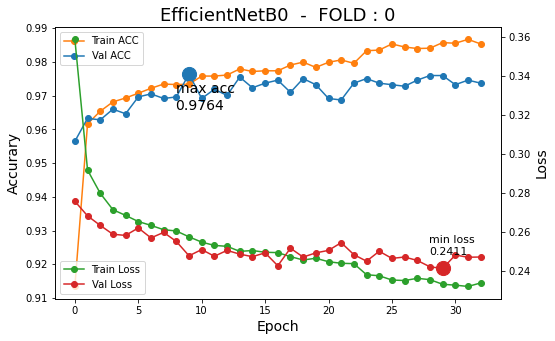

Predicting...
Accuracy 0.974603
              precision    recall  f1-score   support

 Parasitized   0.977231  0.971920  0.974569      1104
  Uninfected   0.971996  0.977293  0.974638      1101

   micro avg   0.974603  0.974603  0.974603      2205
   macro avg   0.974614  0.974607  0.974603      2205
weighted avg   0.974617  0.974603  0.974603      2205
 samples avg   0.974603  0.974603  0.974603      2205

Validating...
345/344 [==============================] - 109s 317ms/step


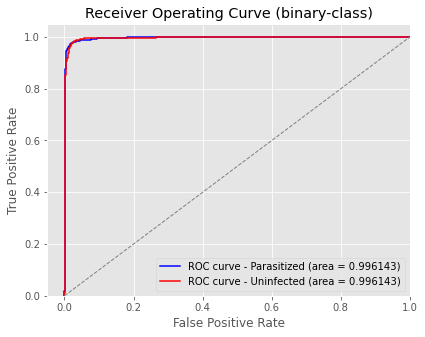

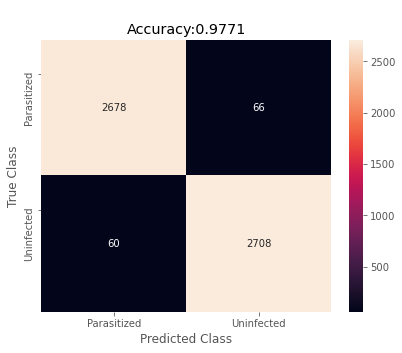

              precision    recall  f1-score   support

 Parasitized   0.978086  0.975948  0.977016      2744
  Uninfected   0.976208  0.978324  0.977265      2768

   micro avg   0.977141  0.977141  0.977141      5512
   macro avg   0.977147  0.977136  0.977140      5512
weighted avg   0.977143  0.977141  0.977141      5512
 samples avg   0.977141  0.977141  0.977141      5512

End of Fold 0 - Elapsed Time: 4:57:09.745551
**************************************************
** Model: EfficientNetB0  fold: 1 
Training...
Found 19841 validated image filenames.
Found 2205 validated image filenames.
Found 5512 validated image filenames.


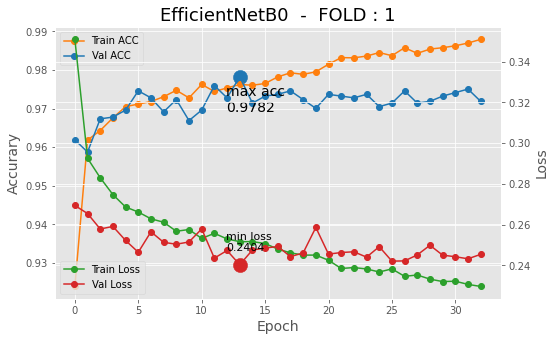

Predicting...
Accuracy 0.977324
              precision    recall  f1-score   support

 Parasitized   0.978221  0.976449  0.977335      1104
  Uninfected   0.976428  0.978202  0.977314      1101

   micro avg   0.977324  0.977324  0.977324      2205
   macro avg   0.977325  0.977325  0.977324      2205
weighted avg   0.977326  0.977324  0.977324      2205
 samples avg   0.977324  0.977324  0.977324      2205

Validating...
345/344 [==============================] - 84s 243ms/step


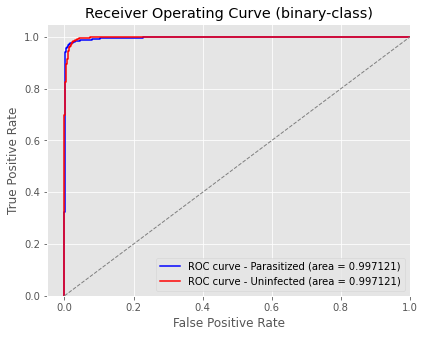

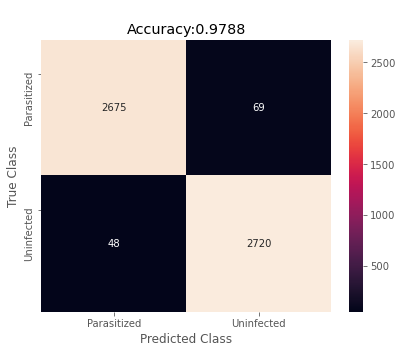

              precision    recall  f1-score   support

 Parasitized   0.982372  0.974854  0.978599      2744
  Uninfected   0.975260  0.982659  0.978945      2768

   micro avg   0.978774  0.978774  0.978774      5512
   macro avg   0.978816  0.978757  0.978772      5512
weighted avg   0.978801  0.978774  0.978773      5512
 samples avg   0.978774  0.978774  0.978774      5512

End of Fold 1 - Elapsed Time: 4:43:37.369983
**************************************************
** Model: EfficientNetB0  fold: 2 
Training...
Found 19841 validated image filenames.
Found 2205 validated image filenames.
Found 5512 validated image filenames.


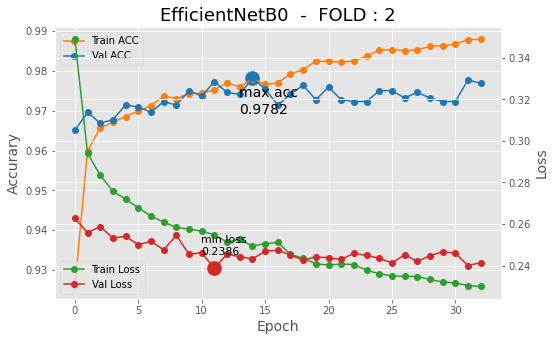

Predicting...
Accuracy 0.976871
              precision    recall  f1-score   support

 Parasitized   0.981702  0.971920  0.976787      1104
  Uninfected   0.972122  0.981835  0.976954      1101

   micro avg   0.976871  0.976871  0.976871      2205
   macro avg   0.976912  0.976877  0.976870      2205
weighted avg   0.976919  0.976871  0.976870      2205
 samples avg   0.976871  0.976871  0.976871      2205

Validating...
345/344 [==============================] - 80s 231ms/step


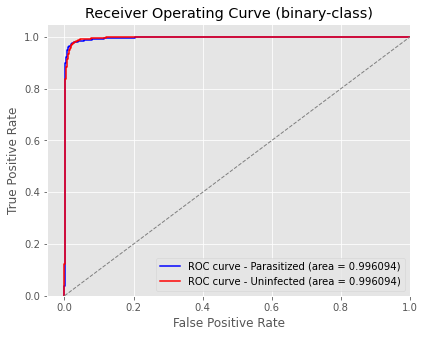

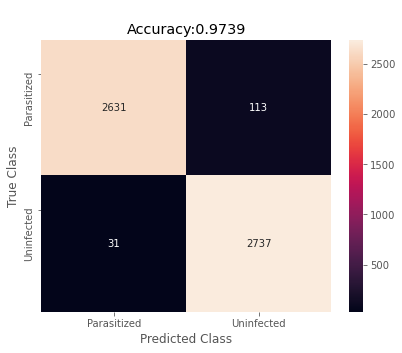

              precision    recall  f1-score   support

 Parasitized   0.988355  0.958819  0.973363      2744
  Uninfected   0.960351  0.988801  0.974368      2768

   micro avg   0.973875  0.973875  0.973875      5512
   macro avg   0.974353  0.973810  0.973866      5512
weighted avg   0.974292  0.973875  0.973868      5512
 samples avg   0.973875  0.973875  0.973875      5512

End of Fold 2 - Elapsed Time: 4:38:21.031119
**************************************************
** Model: EfficientNetB0  fold: 3 
Training...
Found 19841 validated image filenames.
Found 2205 validated image filenames.
Found 5512 validated image filenames.


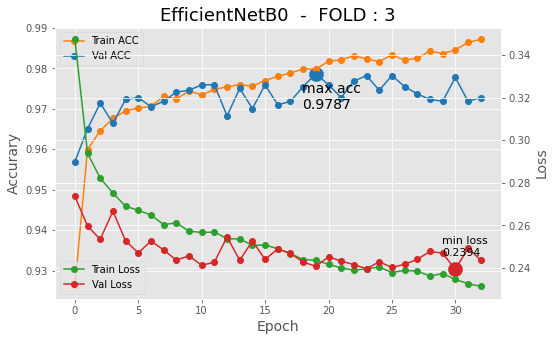

Predicting...
Accuracy 0.974603
              precision    recall  f1-score   support

 Parasitized   0.978102  0.971014  0.974545      1104
  Uninfected   0.971145  0.978202  0.974661      1101

   micro avg   0.974603  0.974603  0.974603      2205
   macro avg   0.974624  0.974608  0.974603      2205
weighted avg   0.974628  0.974603  0.974603      2205
 samples avg   0.974603  0.974603  0.974603      2205

Validating...
345/344 [==============================] - 79s 230ms/step


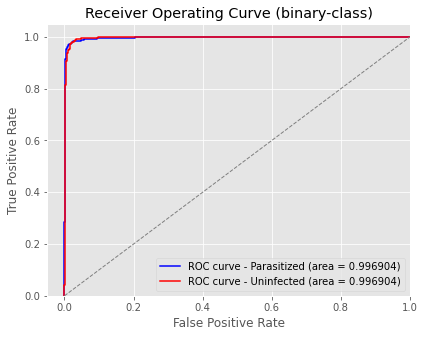

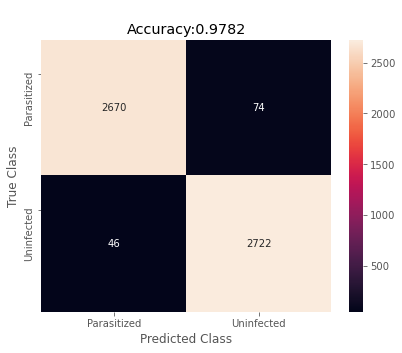

              precision    recall  f1-score   support

 Parasitized   0.983063  0.973032  0.978022      2744
  Uninfected   0.973534  0.983382  0.978433      2768

   micro avg   0.978229  0.978229  0.978229      5512
   macro avg   0.978298  0.978207  0.978227      5512
weighted avg   0.978278  0.978229  0.978228      5512
 samples avg   0.978229  0.978229  0.978229      5512

End of Fold 3 - Elapsed Time: 4:35:22.530893
**************************************************
** Model: EfficientNetB0  fold: 4 
Training...
Found 19841 validated image filenames.
Found 2205 validated image filenames.
Found 5512 validated image filenames.


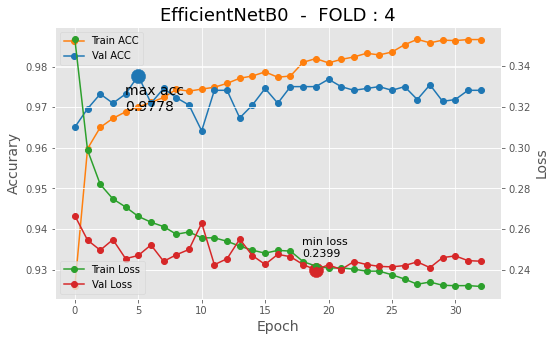

Predicting...
Accuracy 0.973243
              precision    recall  f1-score   support

 Parasitized   0.978042  0.968297  0.973145      1104
  Uninfected   0.968525  0.978202  0.973339      1101

   micro avg   0.973243  0.973243  0.973243      2205
   macro avg   0.973284  0.973249  0.973242      2205
weighted avg   0.973290  0.973243  0.973242      2205
 samples avg   0.973243  0.973243  0.973243      2205

Validating...
345/344 [==============================] - 78s 227ms/step


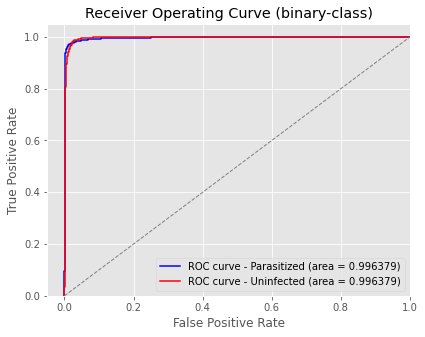

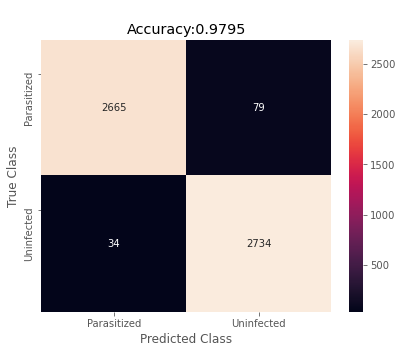

              precision    recall  f1-score   support

 Parasitized   0.987403  0.971210  0.979239      2744
  Uninfected   0.971916  0.987717  0.979753      2768

   micro avg   0.979499  0.979499  0.979499      5512
   macro avg   0.979659  0.979463  0.979496      5512
weighted avg   0.979626  0.979499  0.979497      5512
 samples avg   0.979499  0.979499  0.979499      5512

End of Fold 4 - Elapsed Time: 4:40:23.665173
**************************************************
** Model: EfficientNetB0  fold: 5 
Training...
Found 19841 validated image filenames.
Found 2205 validated image filenames.
Found 5512 validated image filenames.


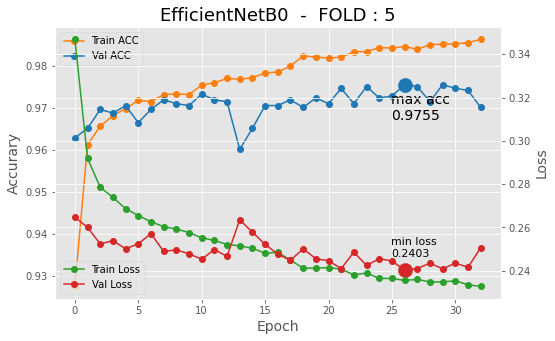

Predicting...
Accuracy 0.974150
              precision    recall  f1-score   support

 Parasitized   0.984259  0.963735  0.973889      1103
  Uninfected   0.964444  0.984574  0.974405      1102

   micro avg   0.974150  0.974150  0.974150      2205
   macro avg   0.974352  0.974154  0.974147      2205
weighted avg   0.974356  0.974150  0.974147      2205
 samples avg   0.974150  0.974150  0.974150      2205

Validating...
345/344 [==============================] - 81s 236ms/step


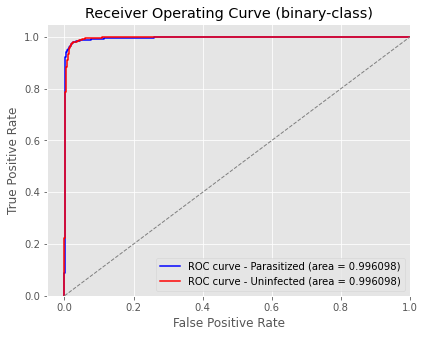

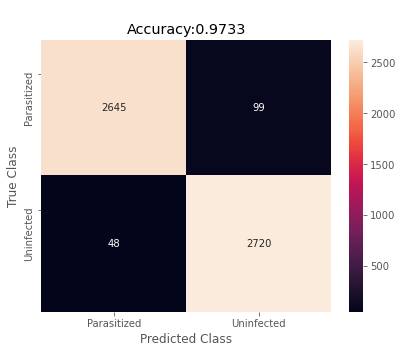

              precision    recall  f1-score   support

 Parasitized   0.982176  0.963921  0.972963      2744
  Uninfected   0.964881  0.982659  0.973689      2768

   micro avg   0.973331  0.973331  0.973331      5512
   macro avg   0.973529  0.973290  0.973326      5512
weighted avg   0.973491  0.973331  0.973328      5512
 samples avg   0.973331  0.973331  0.973331      5512

End of Fold 5 - Elapsed Time: 4:46:31.801410
**************************************************
** Model: EfficientNetB0  fold: 6 
Training...
Found 19842 validated image filenames.
Found 2204 validated image filenames.
Found 5512 validated image filenames.


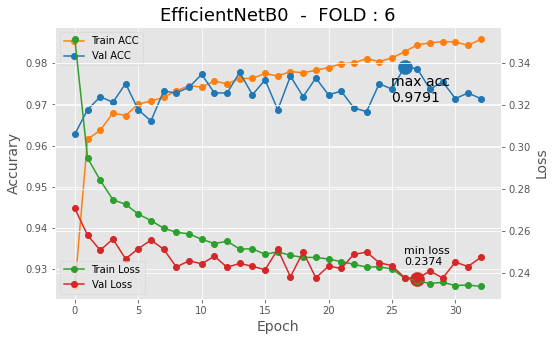

Predicting...
Accuracy 0.976407
              precision    recall  f1-score   support

 Parasitized   0.979909  0.972801  0.976342      1103
  Uninfected   0.972949  0.980018  0.976471      1101

   micro avg   0.976407  0.976407  0.976407      2204
   macro avg   0.976429  0.976410  0.976406      2204
weighted avg   0.976432  0.976407  0.976406      2204
 samples avg   0.976407  0.976407  0.976407      2204

Validating...
345/344 [==============================] - 79s 230ms/step


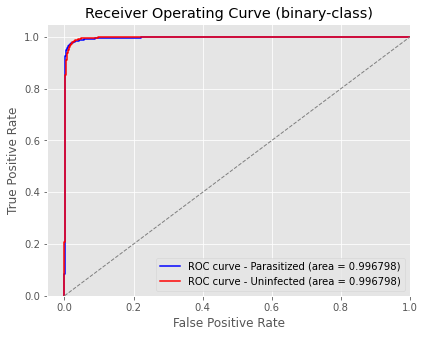

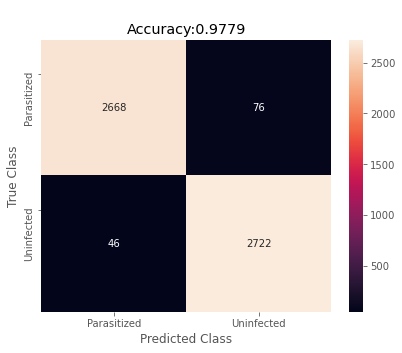

              precision    recall  f1-score   support

 Parasitized   0.983051  0.972303  0.977647      2744
  Uninfected   0.972838  0.983382  0.978081      2768

   micro avg   0.977866  0.977866  0.977866      5512
   macro avg   0.977944  0.977842  0.977864      5512
weighted avg   0.977922  0.977866  0.977865      5512
 samples avg   0.977866  0.977866  0.977866      5512

End of Fold 6 - Elapsed Time: 4:46:42.534757
**************************************************
** Model: EfficientNetB0  fold: 7 
Training...
Found 19842 validated image filenames.
Found 2204 validated image filenames.
Found 5512 validated image filenames.


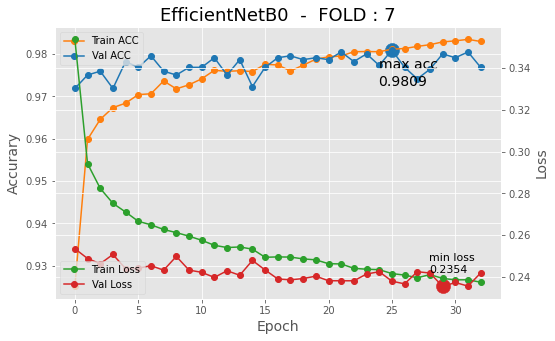

Predicting...
Accuracy 0.983666
              precision    recall  f1-score   support

 Parasitized   0.985441  0.981868  0.983651      1103
  Uninfected   0.981900  0.985468  0.983681      1101

   micro avg   0.983666  0.983666  0.983666      2204
   macro avg   0.983671  0.983668  0.983666      2204
weighted avg   0.983672  0.983666  0.983666      2204
 samples avg   0.983666  0.983666  0.983666      2204

Validating...
345/344 [==============================] - 78s 228ms/step


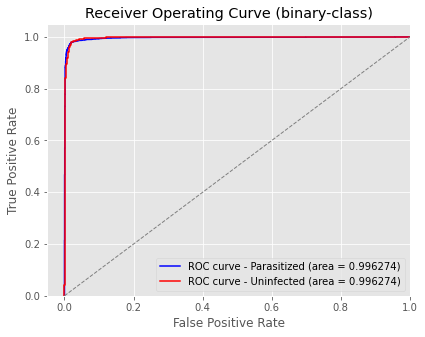

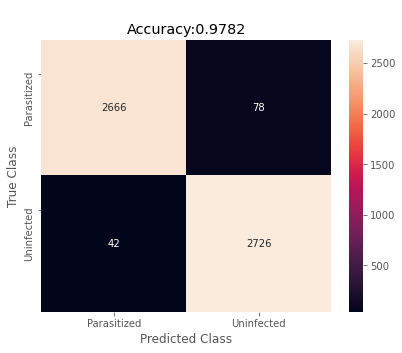

              precision    recall  f1-score   support

 Parasitized   0.984490  0.971574  0.977990      2744
  Uninfected   0.972183  0.984827  0.978464      2768

   micro avg   0.978229  0.978229  0.978229      5512
   macro avg   0.978336  0.978200  0.978227      5512
weighted avg   0.978310  0.978229  0.978228      5512
 samples avg   0.978229  0.978229  0.978229      5512

End of Fold 7 - Elapsed Time: 4:43:31.059613
**************************************************
** Model: EfficientNetB0  fold: 8 
Training...
Found 19842 validated image filenames.
Found 2204 validated image filenames.
Found 5512 validated image filenames.


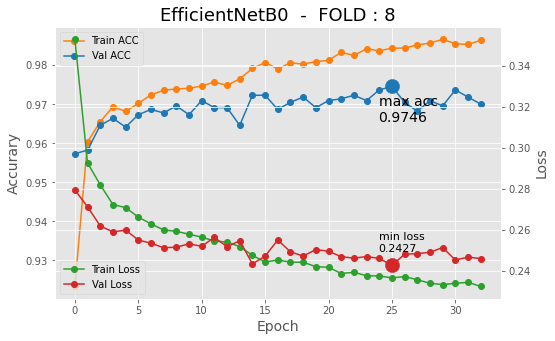

Predicting...
Accuracy 0.970508
              precision    recall  f1-score   support

 Parasitized   0.978782  0.961922  0.970279      1103
  Uninfected   0.962500  0.979110  0.970734      1101

   micro avg   0.970508  0.970508  0.970508      2204
   macro avg   0.970641  0.970516  0.970506      2204
weighted avg   0.970649  0.970508  0.970506      2204
 samples avg   0.970508  0.970508  0.970508      2204

Validating...
345/344 [==============================] - 84s 242ms/step


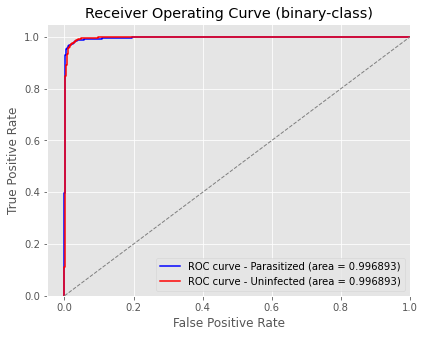

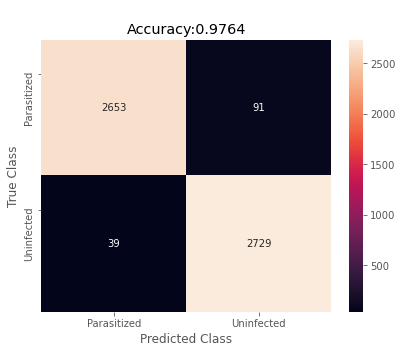

              precision    recall  f1-score   support

 Parasitized   0.985513  0.966837  0.976085      2744
  Uninfected   0.967730  0.985910  0.976736      2768

   micro avg   0.976415  0.976415  0.976415      5512
   macro avg   0.976622  0.976374  0.976411      5512
weighted avg   0.976583  0.976415  0.976412      5512
 samples avg   0.976415  0.976415  0.976415      5512

End of Fold 8 - Elapsed Time: 4:48:50.469830
**************************************************
** Model: EfficientNetB0  fold: 9 
Training...
Found 19842 validated image filenames.
Found 2204 validated image filenames.
Found 5512 validated image filenames.


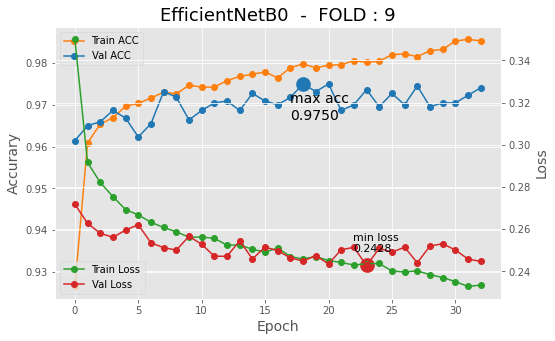

Predicting...
Accuracy 0.975045
              precision    recall  f1-score   support

 Parasitized   0.985185  0.964642  0.974805      1103
  Uninfected   0.965302  0.985468  0.975281      1101

   micro avg   0.975045  0.975045  0.975045      2204
   macro avg   0.975244  0.975055  0.975043      2204
weighted avg   0.975253  0.975045  0.975043      2204
 samples avg   0.975045  0.975045  0.975045      2204

Validating...
345/344 [==============================] - 86s 250ms/step


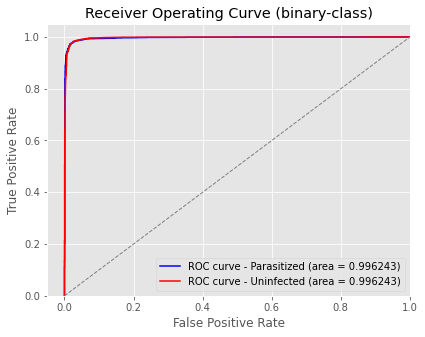

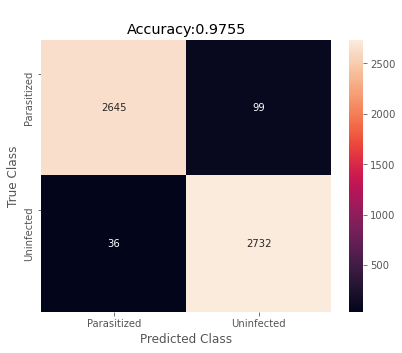

              precision    recall  f1-score   support

 Parasitized   0.986572  0.963921  0.975115      2744
  Uninfected   0.965030  0.986994  0.975889      2768

   micro avg   0.975508  0.975508  0.975508      5512
   macro avg   0.975801  0.975458  0.975502      5512
weighted avg   0.975754  0.975508  0.975504      5512
 samples avg   0.975508  0.975508  0.975508      5512

End of Fold 9 - Elapsed Time: 4:58:10.694449

 Validate emsembled results...


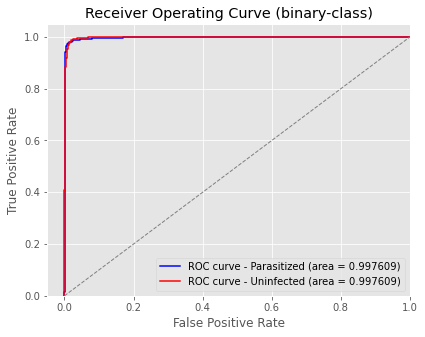

Accuracy 0.982946


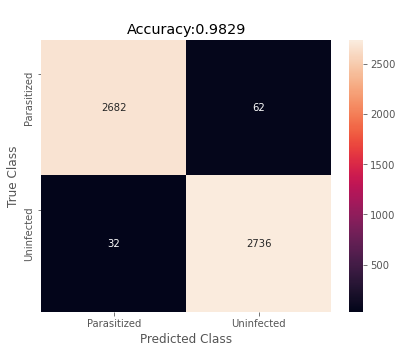

f1 score: 0.982945
              precision    recall  f1-score   support

 Parasitized   0.988209  0.977405  0.982778      2744
  Uninfected   0.977841  0.988439  0.983112      2768

   micro avg   0.982946  0.982946  0.982946      5512
   macro avg   0.983025  0.982922  0.982945      5512
weighted avg   0.983003  0.982946  0.982945      5512
 samples avg   0.982946  0.982946  0.982946      5512


 END Model EfficientNetB0 - Elapsed Time: 1 day, 23:38:44.175101


In [ ]:
from ImageDataAugmentor.image_data_augmentor import *

from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import StratifiedKFold
import gc
from sklearn.metrics import classification_report, accuracy_score, f1_score
from datetime import datetime 
import pickle

# To reproduce results. SEED defined in the PARAMETER section
random.seed(SEED)

# If saving results is desired 
if SAVE_RESULTS: 
    total_results = {'epochs' : EPOCHS, 'batch_size' : BATCH_SIZE,
                     'filename' : FILENAME, 'KFOLD' : KFOLD}

# Loop to simulate. modelos list defined in the parameter section
for (nombre, funcion, preproc, pesos, ancho, alto, freeze, procesar) in modelos:

    # Skip model if required
    if not procesar:
        continue
    else: # Presentation for starting simmulation
        print('#'*50) ; print('### ', nombre); print('#'*50);
        if freeze:
            print('Model frozen....')

    # Start point for Time measurement
    start_model = datetime.now()

    # List of result values initialization
    test_true = {}; test_pred = {}; val_true = {}; val_pred = {}

    # Define custom image data generator with support for albumentations
    data_gen = ImageDataAugmentor(rescale=1/255, augment = aug, 
                                 preprocess_input = preproc)
    
    # Stratified K-Folds cross-validator. Provides train/test indices to split data
    # in train/test sets. KFOLD: number of folds; defined in PARAMETER section
    kf = StratifiedKFold(KFOLD, shuffle = True, random_state = 50)
    
    # Loop for K interations (from k-fold)
    for fold, (train_index, test_index) in enumerate(kf.split(df_learn, 
                                                           df_learn['label'])):
        # fine grain measurement for each fold
        start_fold = datetime.now()      
        
        # presentation
        print('*'*50) ;print('** Model: {}  fold: {} '.format(nombre, fold))
        print('Training...')
        
        # Create sets of train and test images
        df_train = df_learn.iloc[train_index,:]
        df_test = df_learn.iloc[test_index,:]        
        
        # Create data generator for train, test and validation
        # use de ImageDataAugmentor object previously defined
        train_generator = data_gen.flow_from_dataframe(
            df_train, directory= 'data',
            target_size=(ancho, alto), x_col = "file", y_col = TIPOS,
            class_mode = 'raw', shuffle = True, batch_size = BATCH_SIZE)
        
        test_generator = data_gen.flow_from_dataframe(
            df_test, directory='data', 
            target_size=(ancho, alto), x_col = "file", y_col = TIPOS,
            class_mode ='raw', shuffle = False, batch_size = BATCH_SIZE)
        
        val_generator = data_gen.flow_from_dataframe(
            df_val, directory='data',
            target_size = (ancho, alto), x_col = "file", y_col = TIPOS,
            class_mode ='raw', shuffle = False, batch_size = BATCH_SIZE)
        
        # Create the model
        model = create_model(funcion, pesos, ancho, alto, freeze)
        
        # Compile the model
        model.compile(optimizer=Adam(0.0001), loss=custom_loss, 
                      metrics=['accuracy'])
        
        # Train
        results = model.fit(train_generator, epochs = EPOCHS,
                            steps_per_epoch = train_generator.n/BATCH_SIZE,
                            validation_data = test_generator,
                            validation_steps = test_generator.n/BATCH_SIZE,
                            callbacks = create_callbacks(fold),
                            verbose = VERBOSE)
        
        # Plot history
        plot_history(results.history, nombre, fold)

        # Get best model of the training phase for this fold
        model.load_weights('model_{}.hdf5'.format(fold))
        
        # Predict class for test images
        print('Predicting...')
        test_generator.reset()
        test_true[f'fold{fold}'] = df_test.iloc[:,2::]
        test_pred[f'fold{fold}'] = model.predict(test_generator,
                                     steps=test_generator.n/BATCH_SIZE,
                                     verbose=VERBOSE)
        
        # Get and print/plot results for testing
        decission = binary_decission(test_pred[f'fold{fold}'], TIPOS)
        print('Accuracy {:.6f}'.format(accuracy_score(test_true[f"fold{fold}"], 
                                                      decission)))
        print(classification_report(test_true[f"fold{fold}"], decission, 
                                    target_names = TIPOS, digits = 6))
        
        # Validate results with the appropriate set of samples
        print('Validating...')
        val_generator.reset()
        val_true[f'fold{fold}'] = df_val.iloc[:,2::]
        val_pred[f'fold{fold}'] = model.predict(val_generator,
                                                steps=val_generator.n/BATCH_SIZE,
                                                verbose=1)
        
        # Get and print/plot results for validation
        plot_roc_curve(val_true[f'fold{fold}'], val_pred[f'fold{fold}'],TIPOS)
        decission = binary_decission(val_pred[f'fold{fold}'], TIPOS)
        plot_confussion_matrix(val_true[f'fold{fold}'], decission, TIPOS)
        print(classification_report(val_true[f"fold{fold}"], decission, 
                                    target_names = TIPOS, digits = 6))
        
        # Timmings for each k-fold iteration
        print('End of Fold {} - Elapsed Time: {}'.format(fold, datetime.now() - start_fold))

    # End of K-FOLD proccess. Clean environment
    del model, data_gen, train_generator
    tf.keras.backend.clear_session()
    gc.collect()

    # Calculate ensembled results from the K models
    print('\n Validate emsembled results...') 
    val_ensemble = np.array([[0.,0.]]*len(df_val))
    for fold in range(KFOLD):
        val_ensemble = val_pred[f'fold{fold}'] + val_ensemble
    val_ensemble = np.divide(val_ensemble, np.array([KFOLD,KFOLD]))

    # Print / Plot results
    val_true = df_val.iloc[:,2::]
    plot_roc_curve(val_true, val_ensemble,TIPOS)
    decission = binary_decission(val_ensemble, TIPOS)
    print('Accuracy {:.6f}'.format(accuracy_score(val_true, decission)))
    plot_confussion_matrix(val_true, decission, TIPOS)
    f1 = f1_score(val_true, decission, average="macro")
    print('f1 score: {:.6f}'.format(f1))
    print(classification_report(val_true, decission, 
                                target_names = TIPOS, digits = 6))

    # Total time spent
    time_taken = datetime.now() - start_model;
    
    print('\n END Model {} - Elapsed Time: {}'.format(nombre, 
                                               datetime.now() - start_model))
    # Saving results
    if SAVE_RESULTS:     
        total_results[nombre] = {'test_true' : test_true, 'test_pred' : test_pred,
                                 'val_true' : val_true, 'val_pred' : val_pred,
                                 'time_taken' : time_taken }
if SAVE_RESULTS: 
    with open(DIRNAME+FILERES, "wb") as f:    
        pickle.dump(total_results, f)    

## Examine / Summarize Errors
Plot a sample of failed prediction. Both types:

* Real: Parasitized -> Predicted: Uninfected
* Real: Uninfected -> Predicted: Parasitized 

Real: Parasitized -> Predicted: Uninfected      NUM. ERRORS: 62


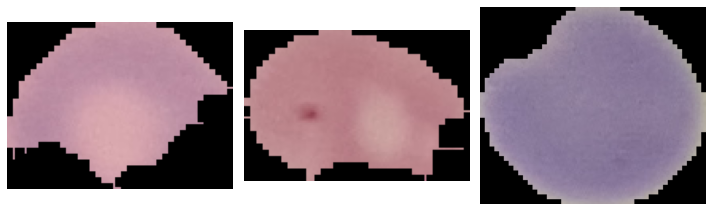

Real: Uninfected -> Predicted: Parasitized      NUM. ERRORS: 32


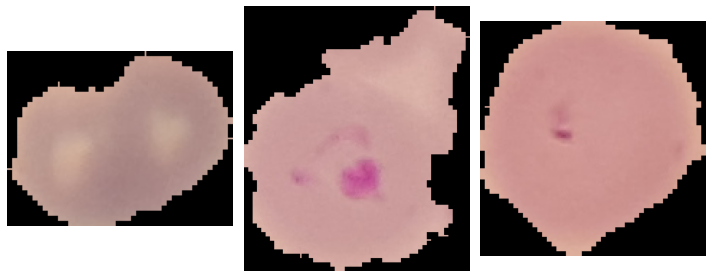

In [ ]:
import random
import matplotlib.pyplot as plt

M = 3               # Minimum number of images to see of each error type

N = len(TIPOS)
for i in range(N):              # i: class number for y_true
    for j in range(N):          # j: class number for y_pred
        if i==j:   # Only errors
            continue
        indices = (val_true.values[:,i]==1) & (decission[:,j]==1)
        errores = sum(indices)
        if (errores < M):
            continue

        images = random.sample(list(df_val['file'][indices]), M)
        print('Real: {0} -> Predicted: {1}      NUM. ERRORS: {2}' \
              .format(TIPOS[i], TIPOS[j], errores))
        plt.figure(figsize=(10,10))
        for k in range(M):
            plt.subplot(1, M, k+1)
            img = plt.imread(DESTDIR+images[k])
            plt.imshow(img)
            plt.axis('off')
        plt.tight_layout()
        plt.show()